### 2. Transaccion típicas y atípicas

>   Using your visualizations, find and display examples of typical and atypical business transactions (e.g., mergers, acquisitions, etc.). Can you infer the motivations behind changes in their activity?

## Carga de datos

In [1]:
import json
import pandas as pd

In [2]:
json_path = './MC3/mc3.json'

In [3]:
# open json file
with open(json_path) as json_file:
    data = json.load(json_file)

In [4]:
# Convert list of dictionaries to DataFrame
df_nodes = pd.DataFrame(data['nodes'])
df_links = pd.DataFrame(data['links'])

### Nodes: Entitites -> Persons, Companies

In [5]:
# Entidades -> partir en personas y otra en organizaciones
df_nodes['type'].value_counts()

type
Entity.Person                           50356
Entity.Organization.Company              7927
Entity.Person.CEO                        1293
Entity.Organization.FishingCompany        600
Entity.Organization.LogisticsCompany      311
Entity.Organization.FinancialCompany       23
Entity.Organization.NewsCompany             5
Entity.Organization.NGO                     5
Name: count, dtype: int64

De los nodos se tienen entidades:
- Person
  - CEO
- Organization
  - FishingCompany
  - LogisticsCompany
  - FinancialCompany
  - NewsCompany
  - NGO

In [12]:
# DataFrames for each type of node
Organization_Company = df_nodes[df_nodes['type'] == 'Entity.Organization.Company']
Organization_FishingCompany = df_nodes[df_nodes['type'] == 'Entity.Organization.FishingCompany']
Organization_LogisticsCompany = df_nodes[df_nodes['type'] == 'Entity.Organization.LogisticsCompany']
Organization_FinancialCompany = df_nodes[df_nodes['type'] == 'Entity.Organization.FinancialCompany']
Organization_NewsCompany = df_nodes[df_nodes['type'] == 'Entity.Organization.NewsCompany']
Organization_NGO = df_nodes[df_nodes['type'] == 'Entity.Organization.NGO']
Person = df_nodes[df_nodes['type'] == 'Entity.Person']
Person_CEO = df_nodes[df_nodes['type'] == 'Entity.Person.CEO']


### Links -> Events, Relationships

In [14]:
# Entidades -> partir en personas y otra en organizaciones
df_links['type'].value_counts()

type
Event.Owns.Shareholdership         39378
Event.Owns.BeneficialOwnership     21531
Event.WorksFor                     14817
Relationship.FamilyRelationship       91
Name: count, dtype: int64

In [15]:
Event_Owns_Shareholdership = df_links[df_links['type'] == 'Event.Owns.Shareholdership']
Event_Owns_BeneficialOwnership = df_links[df_links['type'] == 'Event.Owns.BeneficialOwnership']
Event_WorksFor = df_links[df_links['type'] == 'Event.WorksFor']
Relationship_FamilyRelationship = df_links[df_links['type'] == 'Relationship.FamilyRelationship']

## Analysis

I guess that mergers and acquisitions should be related to dates. Are dates in the data?

In [18]:
Event_Owns_BeneficialOwnership.head(5)

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
335,2018-05-10T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Laura Newman,Briggs-Wilson,0,NaN
338,2013-11-30T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Jillian Morales,Briggs-Wilson,0,NaN
339,2012-05-04T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Anna Bailey,Briggs-Wilson,0,NaN
340,2007-03-16T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Dawn King,Briggs-Wilson,0,NaN
341,2016-09-28T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Dawn King,Fleming-Diaz,0,NaN


What is "beneficial ownership"?
> In domestic and international commercial law, a beneficial owner is a natural person or persons who ultimately owns or controls an interest in a legal entity or arrangement, such as a company, a trust, or a foundation.[1] Legal owners (i.e. the owners on the record), commonly described as the "registered owners", may hold those interests as beneficial owners or for the benefit of someone else, in which case they may be described as a "nominee".  
>  
> Wikipedia contributors, "Beneficial ownership," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Beneficial_ownership&oldid=1225725496 (accessed June 5, 2024).

In simple terms, the **real** owner.

What does source and target means in this dataset?
> Source: The "source" entity is the one that holds ownership, control, or influence over another entity. This could be an individual, a company, or another type of legal entity that has a beneficial ownership interest in the "target" entity.
> 
> Target: The "target" entity is the one that is owned, controlled, or influenced by the "source" entity. This is the entity in which the beneficial ownership interest is held.
>
> OpenAI | ChatGPT



Is there a concentration of ownership in the dataset?  
Let's find out by counting the number of entities that are sources.

In [19]:
# count unique values in the column source
Event_Owns_BeneficialOwnership['source'].value_counts()

source
Sandra Young        92
Anna Davis          92
Cynthia Anderson    91
Kelsey Ortega       91
Breanna Price       91
                    ..
Marc Haney           1
Veronica Proctor     1
Rachel Garcia        1
Eric Klein           1
Carl Martinez        1
Name: count, Length: 16231, dtype: int64

There are a lot of owners!  Let's see how many use more than 10 targets.

In [21]:
## same as above but only those with more than entries
moreThan10 = Event_Owns_BeneficialOwnership['source'].value_counts()[Event_Owns_BeneficialOwnership['source'].value_counts() > 10]
len(moreThan10)

34

Not too much.

I can track the dates for a single one of them. Let's see for those at the top of the list, the ones with more than 10 targets.  
I'd like to plot a timeline for each of them to see if the changes of targets are related to the dates of the transactions.

In [22]:
moreThan10.head(5)

source
Sandra Young        92
Anna Davis          92
Cynthia Anderson    91
Kelsey Ortega       91
Breanna Price       91
Name: count, dtype: int64

In [38]:
# Let's take the first one, source = 'Sandra Young'
# I want to use holoviews to plot a timeline with horizontal bars for each target start_date and if there is one end_date
# I will use the target as the y of each horizontal bar in the plot

# Filter the data
source = 'Sandra Young'
df_source = Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['source'] == source]

In [45]:
# show only columns for targets, start_date and end_date
singleSource = df_source[['target', 'start_date', 'end_date']]

In [47]:
singleSource.sort_values(by='target', inplace=False)

,target,start_date,end_date
1966,Adams-Byrd,2027-03-30T00:00:00,NaN
1999,"Alexander, Harris and Rhodes",2033-03-25T00:00:00,NaN
1949,"Anderson, Smith and Weber",2020-09-26T00:00:00,NaN
2007,Anderson-Vazquez,2011-11-27T00:00:00,NaN
1977,Andrade and Sons,2027-08-05T00:00:00,NaN
...,...,...,...
2037,Walker LLC,2032-09-03T00:00:00,NaN
1982,Walker-Thompson,2017-07-09T00:00:00,NaN
1957,Walton-Blair,2029-10-19T00:00:00,NaN
2026,"Wells, Morales and Gallagher",2008-09-27T00:00:00,NaN


In [43]:
min(singleSource['start_date'])

Timestamp('2005-09-08 00:00:00')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
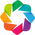

In [41]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
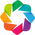

Loading BokehJS ...

/tmp/ipykernel_184438/1132148585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singleSource['start_date'] = pd.to_datetime(singleSource['start_date'])
/tmp/ipykernel_184438/1132148585.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singleSource['end_date'] = pd.to_datetime(singleSource['end_date'])


:Overlay
   .Rectangles.I        :Rectangles   [x0,y0,x1,y1]
   .Rectangles.II       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.III      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.IV       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.V        :Rectangles   [x0,y0,x1,y1]
   .Rectangles.VI       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.VII      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.VIII     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.IX       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.X        :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XI       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XII      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XIII     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XIV      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XV       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XVI      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XVII     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XVIII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XIX      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XX       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXI      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXII     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXIII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXIV     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXV      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXVI     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXVII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXVIII   :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXIX     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXX      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXI     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXIII   :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXIV    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXV     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXVI    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXVII   :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXVIII  :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XXXIX    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XL       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLI      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLII     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLIII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLIV     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLV      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLVI     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLVII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLVIII   :Rectangles   [x0,y0,x1,y1]
   .Rectangles.XLIX     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.L        :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LI       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LII      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LIII     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LIV      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LV       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LVI      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LVII     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LVIII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LIX      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LX       :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXI      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXII     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXIII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXIV     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXV      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXVI     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXVII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXVIII   :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXIX     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXX      :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXXI     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXXII    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXXIII   :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXXIV    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXXV     :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXXVI    :Rectangles   [x0,y0,x1,y1]
   .Rectangles.LXXVII   :Rectangles   [

In [42]:
import pandas as pd
import holoviews as hv
from holoviews import opts
from bokeh.io import output_notebook

# Activate HoloViews with Bokeh backend
hv.extension('bokeh')
output_notebook()

singleSource['start_date'] = pd.to_datetime(singleSource['start_date'])
singleSource['end_date'] = pd.to_datetime(singleSource['end_date'])

# Create Rectangles for the Gantt chart
rectangles = []
for _, row in singleSource.iterrows():
    rectangles.append(hv.Rectangles([(row['start_date'], row['target'], row['end_date'], row['target'])]))

gantt_chart = hv.Overlay(rectangles)

# Customize plot options
gantt_chart.opts(
    opts.Rectangles(height=400, width=800, show_grid=True, xrotation=45, ylabel='Target', xlabel='Date',
                    tools=['hover'], show_legend=False, title="Gantt Chart", line_width=2, fill_alpha=0.5)
)

# Display Gantt chart
gantt_chart


In [33]:
rectangles

[:Rectangles   [x0,y0,x1,y1],
 :Rectangles   [x0,y0,x1,y1],
 :Rectangles   [x0,y0,x1,y1]]